In [1]:
import numpy as np
import os

# Load data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    # Load items into a dictionary
    cifar = dict(npz_file.items())


print(cifar.keys()) # why is there an 'allow_pickle' key ?

dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])


In [2]:
# 1 - Print the class distribution, i.e., the proportion of images in each category.
labels = cifar['labels']
import pandas as pd
pd.value_counts(labels, normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

In [3]:
# 2 - What is the accuracy of the "most-frequent" baseline?
# the accuracy of the most-frequent baseline is 1/4, as the distribution is uniform between the 4 labels.

flat array shape (5000, 3072)
re-shaped array (32, 32, 3)


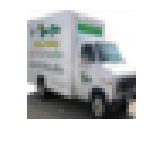

truck


In [4]:
# 3 - Plot a few images from the data set, e.g., ten images from each category.

# load data from the input matrix with the flat vectors of pixels
flat_img = cifar['pixels']
print('flat array shape',flat_img.shape)

# Reshape the "flat vector" of the first array into a 32x32x3 array 
img = flat_img[0].reshape(32, 32, 3)
print('re-shaped array',img.shape)

#plot image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
plt.imshow(img)
plt.axis('off') # Hide the x- and y-axis
plt.show()
print(cifar['names'][labels[0]])

In [5]:
# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Print its label
    label = y[idx]
    print('Label: {} ({})'.format(
        label,
        cifar['names'][label] # Class name
    ))
    
    # Get image pixels
    flat_img = X[idx] # has shape (3072,)
    
    # Reshape the "flat vector" into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    # Plot the image
    plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
    plt.imshow(img)
    plt.axis('off') # Hide the x- and y-axis
    plt.show()

Label: 0 (truck)


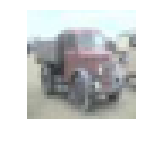

Label: 0 (truck)


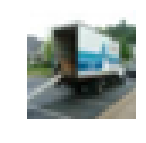

Label: 1 (car)


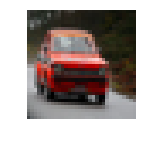

Label: 2 (airplane)


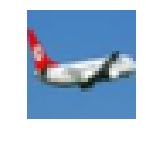

Label: 1 (car)


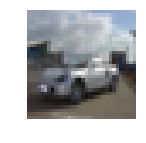

Label: 2 (airplane)


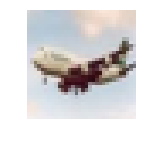

Label: 1 (car)


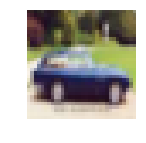

Label: 3 (ship)


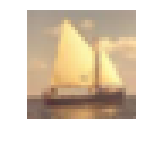

Label: 0 (truck)


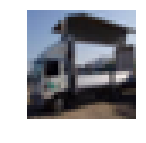

Label: 3 (ship)


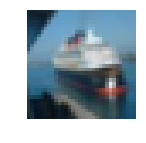

In [6]:
import random
for x in range(10):
  show_image(random.randint(1,5000),cifar['pixels'], cifar['labels']) 

In [7]:
# 4 - Create a scree plot of the OverFeat features.
# Create X/y arrays
X = cifar['overfeat'].astype(np.float32)
y = cifar['labels'].astype(np.float32)

print('X:', X.shape)
print('y:', y.shape)

X: (5000, 4096)
y: (5000,)


In [8]:
# Rescale the data
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

In [9]:
# Create PCA transformer
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

# Apply PCA to rescaled data
pca.fit(X_rescaled)

# Proportion of variance explained
pve = pca.explained_variance_ratio_
pve.shape

(4096,)

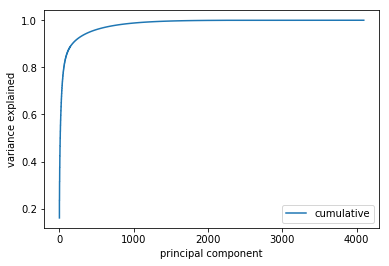

In [10]:
# Cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    np.arange(1, len(pve) + 1),
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

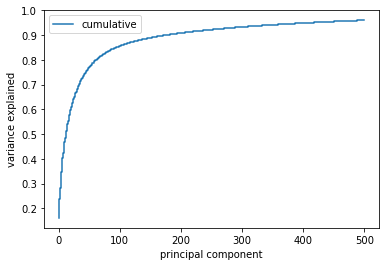

In [11]:
# Cumulative sum, limit to first 500 components
pve_cumsum = np.cumsum(pve)
plt.step(
    np.arange(1, 500),
    pve_cumsum[:499], # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

In [16]:
# What is the cumulated proportion of variance explained (PVE) in the first two components?
np.cumsum(pve)[1]

0.23541819

In [15]:
# How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?

def cumul(a):
    b = np.flatnonzero(np.isclose(np.cumsum(pve), a, atol=0.001))[0]
    return print(b, ' components needed to retain ', a,' of the variance explained')

cumul(0.8)
cumul(0.9)
cumul(0.95)
cumul(0.99)

61  components needed to retain  0.8  of the variance explained
172  components needed to retain  0.9  of the variance explained
400  components needed to retain  0.95  of the variance explained
1031  components needed to retain  0.99  of the variance explained
